In [ ]:
pip install scikeras

  Using cached scikeras-0.12.0-py3-none-any.whl (27 kB)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from google.colab import drive
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.utils import to_categorical,plot_model
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection  import cross_val_score,train_test_split,cross_val_predict
from keras.metrics import categorical_accuracy,Precision, Recall,F1Score
from sklearn.metrics import confusion_matrix

In [ ]:
# Montar o Google Drive
drive.mount('/content/drive')

#eu dividi por 255 para normalizar as entradas
caminho_arquivo = '/content/drive/MyDrive/Colab Notebooks/mnist_train.csv'
dados = pd.read_csv(caminho_arquivo)

atributos = dados.iloc[:, 1:].values.astype(float) / 255.0
classes = dados.iloc[:, 0].values


Mounted at /content/drive


Os valores da entrada são dividos por 255 para normalizar os valores, deixando-os entre 0 e 1, melhorando a convergência do modelo.

In [ ]:

classe_dummy = to_categorical(classes)

In [ ]:

def criarRede():
    mlp = Sequential()
    mlp.add(Dense(units=397, activation='relu', kernel_initializer='random_uniform', input_dim=784))
    mlp.add(Dropout(0.2))
    mlp.add(BatchNormalization())
    mlp.add(Dense(units=397, activation='relu', kernel_initializer='random_uniform'))
    mlp.add(Dropout(0.2))
    mlp.add(BatchNormalization())
    mlp.add(Dense(units=10, activation='softmax'))

    # Definir as métricas
    metrics = [categorical_accuracy, Precision(), Recall(),F1Score()]

    mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)
    return mlp


O arquivo possui 784 colunas para definir os números (valores dos pixels), ou seja, há 784 entradas. Os dígitos vão de "0" a "9", então há 10 saídas. Usamos a fórmula recomendada para definir a quantidade de neurônios na camada oculta: (número de entradas + número de saídas/2), então há 397 neurônios em cada camada oculta. O batch normalization é usado para melhorar a eficiência do treinamento, permitindo uma convergência em um tempo menor e reduzindo o overfitting.

In [ ]:
mlp = KerasClassifier(build_fn= criarRede, epochs=10, batch_size=10)
start = time.time()
resultados = cross_val_score(estimator=mlp , X=atributos , y= classe_dummy, cv =5 , scoring="accuracy")
elapsed = (time.time() - start)


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
4800/4800 [==============================] - 31s 6ms/step - loss: 0.4370 - categorical_accuracy: 0.8648 - precision: 0.8910 - recall: 0.8436 - f1_score: 0.8633
Epoch 2/10
4800/4800 [==============================] - 34s 7ms/step - loss: 0.3081 - categorical_accuracy: 0.9076 - precision: 0.9245 - recall: 0.8939 - f1_score: 0.9067
Epoch 3/10
4800/4800 [==============================] - 30s 6ms/step - loss: 0.2680 - categorical_accuracy: 0.9169 - precision: 0.9309 - recall: 0.9060 - f1_score: 0.9161
Epoch 4/10
4800/4800 [==============================] - 32s 7ms/step - loss: 0.2430 - categorical_accuracy: 0.9255 - precision: 0.9366 - recall: 0.9161 - f1_score: 0.9248
Epoch 5/10
4800/4800 [==============================] - 30s 6ms/step - loss: 0.2289 - categorical_accuracy: 0.9290 - precision: 0.9402 - recall: 0.9203 - f1_score: 0.9284
Epoch 6/10
4800/4800 [==============================] - 30s 6ms/step - loss: 0.2135 - categorical_accuracy: 0.9340 - precision: 0.9440 - recall: 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
4800/4800 [==============================] - 31s 6ms/step - loss: 0.4305 - categorical_accuracy: 0.8680 - precision_1: 0.8933 - recall_1: 0.8476 - f1_score: 0.8665
Epoch 2/10
4800/4800 [==============================] - 29s 6ms/step - loss: 0.3033 - categorical_accuracy: 0.9061 - precision_1: 0.9234 - recall_1: 0.8936 - f1_score: 0.9051
Epoch 3/10
4800/4800 [==============================] - 29s 6ms/step - loss: 0.2663 - categorical_accuracy: 0.9193 - precision_1: 0.9333 - recall_1: 0.9088 - f1_score: 0.9184
Epoch 4/10
4800/4800 [==============================] - 33s 7ms/step - loss: 0.2356 - categorical_accuracy: 0.9284 - precision_1: 0.9400 - recall_1: 0.9202 - f1_score: 0.9277
Epoch 5/10
4800/4800 [==============================] - 31s 6ms/step - loss: 0.2195 - categorical_accuracy: 0.9330 - precision_1: 0.9435 - recall_1: 0.9246 - f1_score: 0.9324
Epoch 6/10
4800/4800 [==============================] - 30s 6ms/step - loss: 0.2009 - categorical_accuracy: 0.9397 - precisio

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
4800/4800 [==============================] - 31s 6ms/step - loss: 0.4397 - categorical_accuracy: 0.8655 - precision_2: 0.8925 - recall_2: 0.8441 - f1_score: 0.8638
Epoch 2/10
4800/4800 [==============================] - 29s 6ms/step - loss: 0.3006 - categorical_accuracy: 0.9085 - precision_2: 0.9243 - recall_2: 0.8954 - f1_score: 0.9076
Epoch 3/10
4800/4800 [==============================] - 33s 7ms/step - loss: 0.2602 - categorical_accuracy: 0.9198 - precision_2: 0.9334 - recall_2: 0.9090 - f1_score: 0.9189
Epoch 4/10
4800/4800 [==============================] - 29s 6ms/step - loss: 0.2357 - categorical_accuracy: 0.9272 - precision_2: 0.9395 - recall_2: 0.9179 - f1_score: 0.9266
Epoch 5/10
4800/4800 [==============================] - 28s 6ms/step - loss: 0.2238 - categorical_accuracy: 0.9316 - precision_2: 0.9421 - recall_2: 0.9238 - f1_score: 0.9308
Epoch 6/10
4800/4800 [==============================] - 29s 6ms/step - loss: 0.2056 - categorical_accuracy: 0.9372 - precisio

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
4800/4800 [==============================] - 33s 7ms/step - loss: 0.4300 - categorical_accuracy: 0.8687 - precision_3: 0.8957 - recall_3: 0.8479 - f1_score: 0.8673
Epoch 2/10
4800/4800 [==============================] - 29s 6ms/step - loss: 0.2971 - categorical_accuracy: 0.9090 - precision_3: 0.9250 - recall_3: 0.8960 - f1_score: 0.9080
Epoch 3/10
4800/4800 [==============================] - 29s 6ms/step - loss: 0.2516 - categorical_accuracy: 0.9214 - precision_3: 0.9348 - recall_3: 0.9120 - f1_score: 0.9205
Epoch 4/10
4800/4800 [==============================] - 30s 6ms/step - loss: 0.2319 - categorical_accuracy: 0.9284 - precision_3: 0.9396 - recall_3: 0.9190 - f1_score: 0.9277
Epoch 5/10
4800/4800 [==============================] - 30s 6ms/step - loss: 0.2157 - categorical_accuracy: 0.9333 - precision_3: 0.9444 - recall_3: 0.9247 - f1_score: 0.9326
Epoch 6/10
4800/4800 [==============================] - 32s 7ms/step - loss: 0.2073 - categorical_accuracy: 0.9358 - precisio

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
4800/4800 [==============================] - 31s 6ms/step - loss: 0.4364 - categorical_accuracy: 0.8655 - precision_4: 0.8930 - recall_4: 0.8442 - f1_score: 0.8639
Epoch 2/10
4800/4800 [==============================] - 31s 6ms/step - loss: 0.2970 - categorical_accuracy: 0.9087 - precision_4: 0.9251 - recall_4: 0.8958 - f1_score: 0.9078
Epoch 3/10
4800/4800 [==============================] - 31s 6ms/step - loss: 0.2622 - categorical_accuracy: 0.9198 - precision_4: 0.9342 - recall_4: 0.9091 - f1_score: 0.9190
Epoch 4/10
4800/4800 [==============================] - 30s 6ms/step - loss: 0.2405 - categorical_accuracy: 0.9269 - precision_4: 0.9385 - recall_4: 0.9170 - f1_score: 0.9262
Epoch 5/10
4800/4800 [==============================] - 30s 6ms/step - loss: 0.2209 - categorical_accuracy: 0.9319 - precision_4: 0.9425 - recall_4: 0.9243 - f1_score: 0.9312
Epoch 6/10
4800/4800 [==============================] - 29s 6ms/step - loss: 0.2105 - categorical_accuracy: 0.9363 - precisio

precision = porcentagem de predições corretas em relação ao total de predições\
recall = porcentagem de predições corretas em relação ao total de valores reais\
f1-score = média harmônica envolvendo a precisão

In [ ]:
print(elapsed)


1618.2502517700195


Tempo obtido em segundos

In [ ]:
resultados.mean()

0.9710166666666666

As múltiplas iterações com cada pacote geram precisões diferentes. A média das acurácias usando cada pacote é calculada para servir como um melhor retorno da acurácia do modelo, pois garante-se que não se obteve uma acurácia muito alta devido à sorte no sorteio dos pesos.

In [ ]:
caminho_arquivo = '/content/drive/MyDrive/Colab Notebooks/mnist_test.csv'
dados = pd.read_csv(caminho_arquivo)

atributosT = dados.iloc[:, 1:].values.astype(float) / 255.0
classeT = dados.iloc[:, 0].values
classeT_dummy = to_categorical(classeT)


In [ ]:
mlp.fit(atributosT, classeT_dummy)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
1000/1000 [==============================] - 8s 7ms/step - loss: 0.5989 - categorical_accuracy: 0.8099 - precision_5: 0.8501 - recall_5: 0.7831 - f1_score: 0.8073
Epoch 2/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.3941 - categorical_accuracy: 0.8784 - precision_5: 0.9014 - recall_5: 0.8566 - f1_score: 0.8773
Epoch 3/10
1000/1000 [==============================] - 7s 7ms/step - loss: 0.3587 - categorical_accuracy: 0.8857 - precision_5: 0.9043 - recall_5: 0.8681 - f1_score: 0.8843
Epoch 4/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.2983 - categorical_accuracy: 0.9049 - precision_5: 0.9211 - recall_5: 0.8907 - f1_score: 0.9038
Epoch 5/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.2698 - categorical_accuracy: 0.9156 - precision_5: 0.9289 - recall_5: 0.9035 - f1_score: 0.9148
Epoch 6/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.2585 - categorical_accuracy: 0.9165 - precision_5: 0

KerasClassifier(
	model=None
	build_fn=<function criarRede at 0x7a1468c68790>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

In [ ]:
resultado = mlp.predict(atributosT)

1000/1000 [==============================] - 2s 2ms/step


In [ ]:
result = np.argmax(resultado, axis=1)
matrix = confusion_matrix(classeT, result)

print(matrix)

[[ 969    0    0    1    0    3    5    0    2    0]
 [   0 1126    1    1    0    0    0    2    5    0]
 [   2    0 1023    0    1    0    1    0    5    0]
 [   1    0    1  996    0    5    0    2    4    1]
 [   1    0    4    0  969    0    5    0    0    3]
 [   1    0    0   13    1  867    4    0    2    4]
 [   2    2    0    0    0    2  945    0    7    0]
 [   0    6   16    9    2    0    0  986    2    7]
 [   0    0    1    7    4    3    3    0  954    2]
 [   4    4    1    5   28    0    1    2    3  961]]


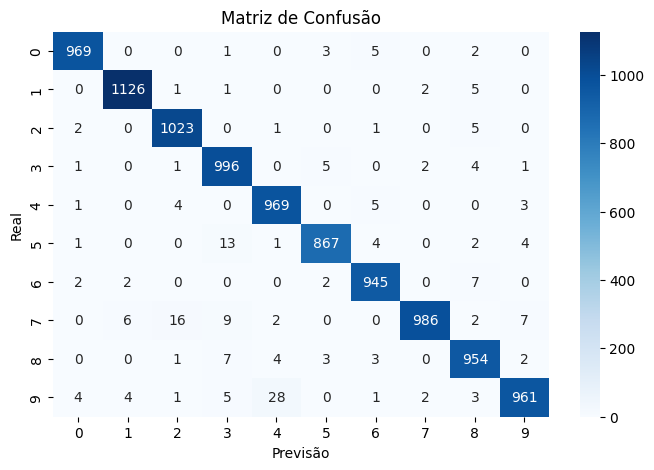

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

In [ ]:
mlp.model_.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 397)               311645    
                                                                 
 dropout_10 (Dropout)        (None, 397)               0         
                                                                 
 batch_normalization_10 (Ba  (None, 397)               1588      
 tchNormalization)                                               
                                                                 
 dense_16 (Dense)            (None, 397)               158006    
                                                                 
 dropout_11 (Dropout)        (None, 397)               0         
                                                                 
 batch_normalization_11 (Ba  (None, 397)               1588      
 tchNormalization)                                    

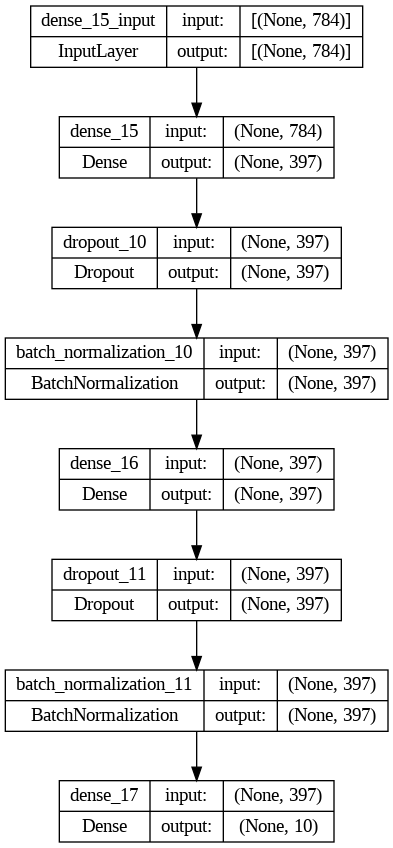

In [ ]:
plot_model(mlp.model_, to_file='model_plot.png', show_shapes=True, show_layer_names=True)